# Getting Started with GeoPandas!

## OSM preamble
1. Filter OSM data as you'd like
2. Use `osmium export input.osm.pbf output.geojson` to convert
3. Use `ogr2ogr -f "GPKG" output.gpkg input.geojson` to convert to gpkg

## Conda / Environment Preamble
1. Do the following in terminal, with conda or miniconda installed: https://docs.conda.io/en/latest/miniconda.html
2. `conda create -n my_geo_env geopandas pandas jupyter` to create your environment and install base packages
3. `conda activate my_geo_env` to activate the environment
4. `jupyter notebook` to open jupyter notebook!

In [25]:
import geopandas as gpd
import pandas as pd
from glob import glob

<AxesSubplot:>

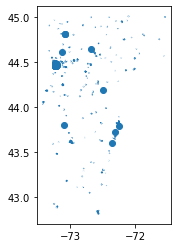

In [26]:
# read file
vt_parks = gpd.read_file("vt.gpkg")
# preview plot
vt_parks.plot()

In [27]:
# preview first rows of data
vt_parks.head()

,highway,created_by,amenity,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,name,power,...,contact:website,operator:short,operator:type,operator:wikidata,operator:wikipedia,elevation,area,protect_class,protection_title,geometry
0,traffic_signals,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.08355 44.81037)
1,None,GPSBabel-1.3.5,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.22165 44.47791)
2,None,GPSBabel-1.3.5,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.22401 44.48091)
3,None,GPSBabel-1.3.5,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.22164 44.47789)
4,None,GPSBabel-1.3.5,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.20933 44.46211)


In [28]:
# preview data shape (rows x columns)
vt_parks.shape

(806, 83)

In [29]:
# dissolve data 
# optionally, use vt_parks.dissolve(on="column_name") to dissolve on a column match
# like country code or geoid
vt_dissolved = vt_parks.dissolve()
vt_dissolved.shape

(1, 83)

<AxesSubplot:>

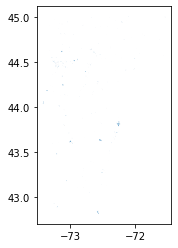

In [30]:
# plot dissolved
vt_dissolved.plot()

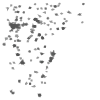

In [31]:
# alternatively, this is a lower-level unary union
# this ignores columns and just takes the geometry
# dissolve likely a better option
vt_parks.geometry.unary_union

In [32]:
# FOR Example only, splitting into multiple parts
part1 = vt_parks.iloc[0:400]
part2 = vt_parks.iloc[400:]

In [33]:
# union multiple dataframes
combined_parts = pd.concat([part1,part2])

In [34]:
# to combine multiple geopackages from a folder
# glob searches for files matching the provided pattern with * as a wildcard (any match)

# empty list / array
my_gdfs = []
# search for any .gpkg file in current directory
my_file_list = glob('*.gpkg')

# loop through files and add to the list
# append adds to list
# gpd.read_file reads file and returns a geodataframe
for file in my_file_list:
    my_gdfs.append(gpd.read_file(file))

# use concat again to union!
combined_gdfs = pd.concat(my_gdfs)